## Titanic Survival Prediction 
### Problem type - binary classification 
### goal to predict if the person survied or not (0 = No, 1 = Yes).


In [168]:
import numpy as np 
import pandas as pd 

## Understanding the data 

In [169]:
df = pd.read_csv('datasets/Titanic.csv')
df = pd.DataFrame(df)

In [170]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [171]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [172]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Visualizing the data

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Survived', ylabel='count'>

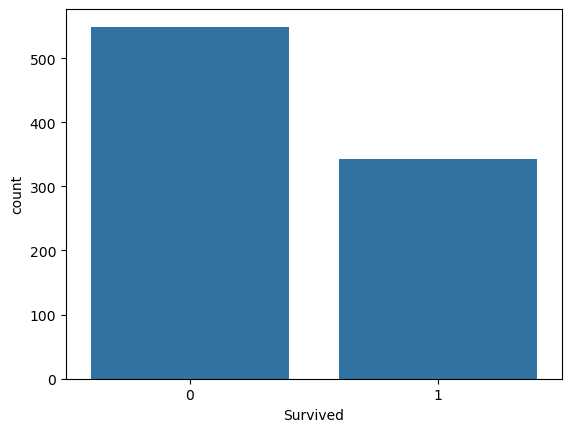

In [175]:
# Survival count
sns.countplot(x='Survived', data=df)
# This chart shows survival in titanic 
# 1 denotes survied and 0 denotes not survived 

<Axes: xlabel='Survived', ylabel='count'>

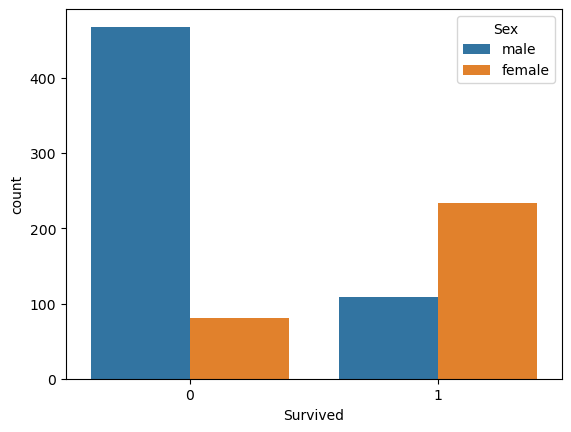

In [176]:
# Survival by gender
sns.countplot(x='Survived', hue='Sex', data=df)
# This data shows the distribtion of male and female in survived and not survived class 

<Axes: xlabel='Survived', ylabel='count'>

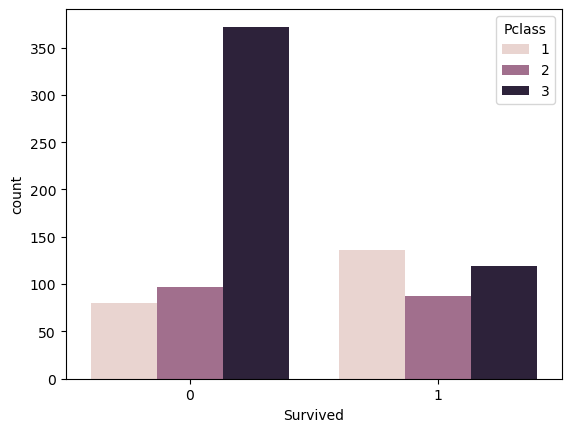

In [177]:
# Survival by class
sns.countplot(x='Survived', hue='Pclass', data=df)
# This data shows the distribtion of Passenger Classes (1,2,3) in survived and not survived Passenger Classes (1,2,3)

## Data Preprocessing 

In [178]:
# Checking null data 
df.isnull().sum()
# Here Age has 177 null collumns, Cabin has 687 and Embarked with 2 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The "Embarked" column in the Titanic dataset represents the port where a passenger boarded the ship. It has three possible values:
- Southampton (S) was the most common embarkation point.
- Cherbourg (C) was often associated with wealthier passengers.
- Queenstown (Q) was used by many third-class passengers.

In [179]:
# we can drop the column or fill the collumn with additional data (mean,median etc etc )

In [180]:
df['Age'] = df['Age'].fillna(df['Age'].median())  # Filling data with Median of 
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Direct assignment 


In [181]:
# Convert categorical variable 
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True) # removed Embarked


In [182]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


## Feature Engineering 

In [183]:
# No feature engineering required as the data is not as complex as seen 


## The real Machine Learning 

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId','Cabin'])
y = df['Survived'].to_numpy()  # Converts to NumPy array
y.shape

(891,)

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [187]:
# As the data is of binary classificcation we are using Logistic Regression for the dataset

In [204]:
# Scaling the data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize feature values


In [205]:
from sklearn.linear_model import LogisticRegression

In [206]:
lr = LogisticRegression(max_iter=500)

In [207]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,False,True
1,1,1,38.0,1,0,71.2833,False,False
2,3,1,26.0,0,0,7.9250,False,True
3,1,1,35.0,1,0,53.1000,False,True
4,3,0,35.0,0,0,8.0500,False,True


In [210]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [211]:
print(df.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked_Q        bool
Embarked_S        bool
dtype: object


In [212]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8100558659217877
